# NLP with Disaster Tweets Competition (Kaggle)

This Natural Language Processing(NLP) project was created to participate in the "Twitter Disaster Detection" competition on Kaggle. Explore Natural Language Processing techniques, data analysis, and model creation to detect real-time emergencies on Twitter.

### Competition Description
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

Link to Competition: https://www.kaggle.com/competitions/nlp-getting-started

# Summary

### Chapter 1: Exploratory and Statistical Analysis
- 1.1: Importing Data and First Look
- 1.2: Checking Data Types and Statistics
- 1.3: Checking Null Values

### Chapter 2: Data Processing
- 2.1: Handling Null Values 
- 2.2: Creating Tags Column and Handling Undesired Content
- 2.3: Final Processing

### Chapter 3: Tags Processing
- 3.1: Stop Words
- 3.2: Stemming
- 3.3: Train Test Split and Count Vectorizer

### Chapter 4: Creating and Testing ML Models
- 4.1: Naive Bayes
- 4.2: Random Forest
- 4.3: Ensemble Model (Naive Bayes + Random Forest)

# Chapter 1 - Exploratory and Statistical Analysis

In this section, we take a close look at our data to understand what it can tell us. 

This step is crucial for getting to know our data better before we dive into more advanced techniques.

### 1.1: Importing Datas and First Look

In [238]:
import pandas as pd
import re 
import warnings
warnings.filterwarnings("ignore")

In [239]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('sample_submission.csv')

# Let's see the first 5 row of train_df
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


Target:

0 -> not a real disaster

1 -> real disaster

In [240]:
# Checking unique values in the 'target' column
unique_values = train_df['target'].unique()
print("Unique values in the 'target' column:", unique_values)

# Counting the occurrences of each value in the 'target' column
value_counts = train_df['target'].value_counts()
print("\nCount of each value in the 'target' column:")
print(value_counts)

Unique values in the 'target' column: [1 0]

Count of each value in the 'target' column:
target
0    4342
1    3271
Name: count, dtype: int64


The 'target' variable in the dataset is balanced.

In [241]:
# Let's see the first 5 row of test_df
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [242]:
# Let's see the first 5 row of sample_df
sample_df.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


### 1.2: Checking Data Types and Statistics

In [243]:
train_df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [244]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


### 1.3: Checking Null Values

In [245]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Let's take a look into the first line of 'Text' column.

In [246]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [247]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [248]:
test_df['text'][0]

'Just happened a terrible car crash'

### 1.4: Visual Analysis

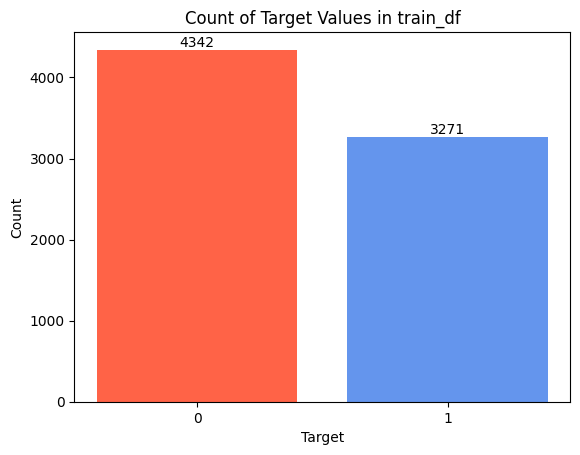

In [249]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'target' column
target_counts = train_df['target'].value_counts()

# Define cores para cada categoria
cores = ['tomato', 'cornflowerblue']

# Create a bar plot
plt.bar(target_counts.index, target_counts.values, color=cores)

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Target Values in train_df')

# Add annotations
for i, value in enumerate(target_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Customize x-axis ticks
plt.xticks(target_counts.index, ['0', '1'])

# Save the plot as an image file (e.g., PNG)
plt.savefig('count_target.png', bbox_inches='tight')

# Show the plot
plt.show()

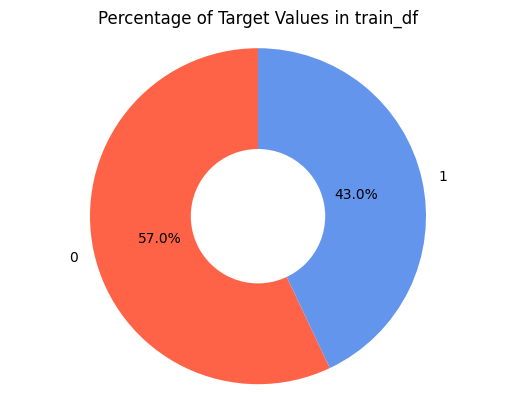

In [250]:
# Count the occurrences of each unique value in the 'target' column
target_counts = train_df['target'].value_counts()

# Create a pie chart
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['tomato', 'cornflowerblue'])

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Percentage of Target Values in train_df')

# Save the plot as an image file (e.g., PNG)
plt.savefig('percentage_target.png', bbox_inches='tight')

# Show the plot
plt.show()

# Chapter 2 - Data Processing
In this chapter, we will handle null and undesired values, as well as create the Tags column, which is crucial for our project.

### 2.1: Handling Null Values

We will replace the NaN values with 'unknown' to represent blank values. This will bring similarity between the data that has empty values in the 'keyword' and 'location' columns.

In [251]:
def fillna_columns(df):
    # Fill missing values in the 'keyword' column with 'Unknown'
    df['keyword'].fillna('Unknown', inplace=True)
    # Fill missing values in the 'location' column with 'Unknown'
    df['location'].fillna('Unknown', inplace=True)

In [252]:
# Fill missing values in the 'keyword' and 'location' columns of the training dataframe
fillna_columns(train_df)

In [253]:
# Fill missing values in the 'keyword' and 'location' columns of the test dataframe
fillna_columns(test_df)

### 2.2: Creating Tags Column and Handling Undesired Content

Creating the column 'Tags'.

In [254]:
def create_tags_column(df):
    # Create the 'tags' column by combining 'keyword', 'location', and 'text' columns
    df['tags'] = df['keyword'] + " " + df['location'] + " " + df['text']
    # Remove URLs from the 'tags' column
    df['tags'] = df['tags'].apply(lambda x: re.sub(r'\bhttp\S+', '', str(x)))

In [255]:
# Apply the function to the training dataframe
create_tags_column(train_df)

In [256]:
# Apply the function to the test dataframe
create_tags_column(test_df)

In [257]:
# Display sample entries to verify the results
print(train_df['tags'][0])
print(test_df['tags'][21])

Unknown Unknown Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
ablaze Washington State Burning Man Ablaze! by Turban Diva  via @Etsy


### 2.3: Final Processing

This function, process_tag, performs several text processing steps on a given tag. It removes single quotes, replaces non-alphabetic characters with spaces, eliminates multiple spaces, and converts the text to lowercase. This preprocessing is commonly used to clean and standardize text data for further analysis or modeling tasks.

In [258]:
def process_tag(tag):
    # Replace single quotes with empty string
    tag = re.sub("\'", "", tag)
    # Replace all non-alphabetic characters with spaces
    tag = re.sub("[^a-zA-Z]"," ",tag)
    # Replace multiple spaces with a single space
    tag = re.sub(r'\s+', ' ', tag)
    # Convert the text to lowercase
    tag = tag.lower()
    return tag

In [259]:
# Applying the process_tag function to all rows of the 'tags' column and replacing the original values
train_df['tags'] = train_df['tags'].apply(process_tag)
train_df['tags'][48]

'ablaze live on webcam check these out nsfw'

In [260]:
# Applying the process_tag function to all rows of the 'tags' column and replacing the original values
test_df['tags'] = test_df['tags'].apply(process_tag)
test_df['tags'][48]

'aftershock california when the aftershock happened nepal we were the last intl team still there in a way we were st responders chief collins laco fd'

# 3 - Tags Processing

### 3.1: Stop Words

We'll download and load the English stop words list using the Natural Language Toolkit (NLTK). The stop words are then used to create a function called 'remover_stop_words' that removes stop words from the 'tags' column in the DataFrame.

This step helps in preprocessing the text data by removing common words that do not contribute significantly to the meaning of the text.

In [261]:
import nltk
from nltk.corpus import stopwords

# Downloading the list of English stop words
nltk.download('stopwords')

# Loading the English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remover_stop_words(tags):
    if isinstance(tags, str):  
        return ' '.join([word for word in tags.split() if word.lower() not in stop_words])
    else:
        return tags  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [262]:
# Applying the function to the 'tags' column using a lambda expression
train_df['tags'] = train_df['tags'].apply(lambda x: remover_stop_words(x))
train_df['tags'][48]

'ablaze live webcam check nsfw'

In [263]:
# Applying the function to the 'tags' column using a lambda expression
test_df['tags'] = test_df['tags'].apply(lambda x: remover_stop_words(x))
test_df['tags'][48]

'aftershock california aftershock happened nepal last intl team still way st responders chief collins laco fd'

### WordCloud

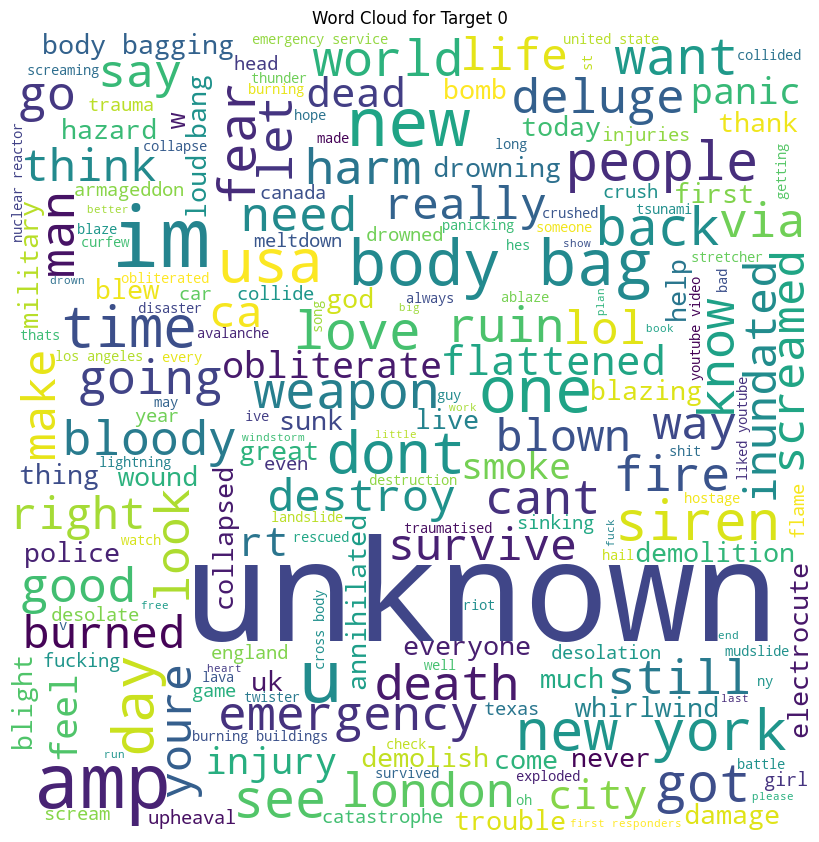

In [264]:
from wordcloud import WordCloud

# Join all tags for target 0
tags_0 = ' '.join(train_df[train_df['target'] == 0]['tags'])

# Generate word cloud for target 0
wordcloud_0 = WordCloud(width=800, height=800, 
                        background_color='white', 
                        stopwords=None, 
                        min_font_size=10).generate(tags_0)

# Plot word cloud for target 0
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud_0) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.title('Word Cloud for Target 0')

# Save the plot as an image file (e.g., PNG)
plt.savefig('wordcloud_target_0.png', bbox_inches='tight')

plt.show()

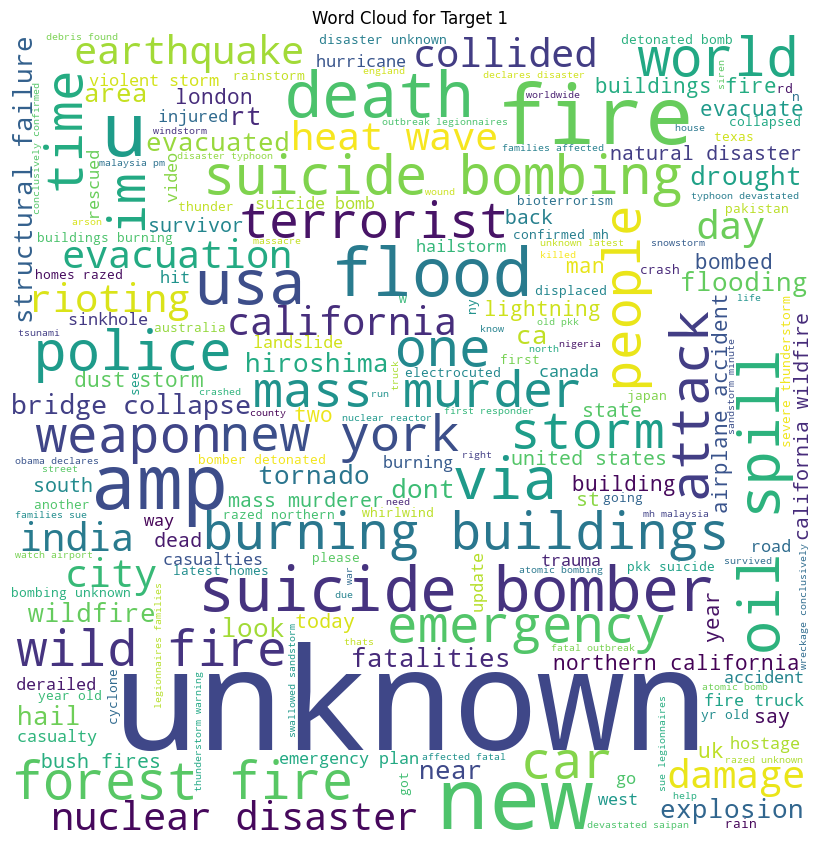

In [265]:
# Join all tags for target 1
tags_1 = ' '.join(train_df[train_df['target'] == 1]['tags'])

# Generate word cloud for target 1
wordcloud_1 = WordCloud(width=800, height=800, 
                        background_color='white', 
                        stopwords=None, 
                        min_font_size=10).generate(tags_1)

# Plot word cloud for target 1
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud_1) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.title('Word Cloud for Target 1')

# Save the plot as an image file (e.g., PNG)
plt.savefig('wordcloud_target_1.png', bbox_inches='tight')

plt.show()

### 3.2: Steeming

We are going to perform the stemming process on our tags

- Stemming is the process of reducing words to their root or base form, even if the result is not a valid word. This helps to group together words with similar meanings. For example, "running," "runs," and "runner" would all be stemmed to "run."

In [266]:
# Steeming

from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stems(text):
    T = []
    
    for i in text.split():
        T.append(ps.stem(i))
    
    return " ".join(T)

In [267]:
# Apply the function to non-null values
train_df['tags'] = train_df['tags'].apply(lambda x: stems(x) if isinstance(x, str) else x)
train_df['tags'][48]

'ablaz live webcam check nsfw'

In [268]:
# Apply the function to non-null values
test_df['tags'] = test_df['tags'].apply(lambda x: stems(x) if isinstance(x, str) else x)
test_df['tags'][0]

'unknown unknown happen terribl car crash'

In [269]:
test_df.head()

,id,keyword,location,text,tags
0,0,Unknown,Unknown,Just happened a terrible car crash,unknown unknown happen terribl car crash
1,2,Unknown,Unknown,"Heard about #earthquake is different cities, s...",unknown unknown heard earthquak differ citi st...
2,3,Unknown,Unknown,"there is a forest fire at spot pond, geese are...",unknown unknown forest fire spot pond gees fle...
3,9,Unknown,Unknown,Apocalypse lighting. #Spokane #wildfires,unknown unknown apocalyps light spokan wildfir
4,11,Unknown,Unknown,Typhoon Soudelor kills 28 in China and Taiwan,unknown unknown typhoon soudelor kill china ta...


### 3.3: Train Test Split and Count Vectorizer

We're about to split the datas into train and test sets, and apply CountVectorizer to our tags, converting them into numerical representations for analysis.

- CountVectorizer is a method used for converting a collection of text documents into a matrix of token counts. It essentially converts text data into numerical data that can be used by machine learning algorithms.

In [270]:
from sklearn.model_selection import train_test_split

# Data split into training and test sets
X = train_df['tags']  # recursos (tags processadas)
y = train_df['target']  # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:
from sklearn.feature_extraction.text import CountVectorizer

# Feature Extraction (in this case, we'll use word counting)
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [272]:
X_test_real_vect = vectorizer.transform(test_df['tags'])

In [273]:
X_test_real_vect [0]

<1x12830 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [274]:
# Combine X_train and y_train into a DataFrame
train_data = pd.DataFrame(data=X_train_vect.toarray(), columns=vectorizer.get_feature_names_out())
train_data['target'] = y_train.values

# Combine X_test and y_test into a DataFrame
test_data = pd.DataFrame(data=X_test_vect.toarray(), columns=vectorizer.get_feature_names_out())
test_data['target'] = y_test.values

# # Save the DataFrames into CSV files
# train_data.to_csv('train_clean_data.csv', index=False)
# test_data.to_csv('test_clean_data.csv', index=False)

# # If you want to include X_test_real_vect as well, you can do the following:
# real_test_data = pd.DataFrame(data=X_test_real_vect.toarray(), columns=vectorizer.get_feature_names_out())
# real_test_data.to_csv('real_test_clean_data.csv', index=False)

# 4 - Creating and Testing ML Models

In this stage, we will build and test our ML models to see the results we can get.

In [275]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report

### 4.1: Naive Bayes


Naive Bayes is a probabilistic classification algorithm that relies on Bayes' theorem to predict the class of a sample. It assumes conditional independence between features, simplifying the probability calculations. 

In [276]:
from sklearn.naive_bayes import MultinomialNB

# Model Training (Naive Bayes)
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)

# Model Evaluation
y_pred_nb = nb_model.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred_nb)
# Calculating F1 for the Naive Bayes model
f1_nb = f1_score(y_test, y_pred_nb)

print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

[[723 151]
 [157 492]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       874
           1       0.77      0.76      0.76       649

    accuracy                           0.80      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [277]:
# # Making predictions using the trained model
# y_pred_nb_real = nb_model.predict(X_test_real_vect)

# # Creating a DataFrame with the predictions
# submission_df = pd.DataFrame({'id': test_df['id'], 'target': y_pred_nb_real})

# submission_df.head()

### 4.2: Random Forest

Random Forest is a versatile machine learning algorithm that operates by constructing a multitude of decision trees during training and outputting the mode of the classes (classification) or the mean prediction (regression) of the individual trees. It excels in handling high-dimensional datasets with complex interactions and is robust against overfitting. Random Forest is widely used for classification.

In [278]:
from sklearn.ensemble import RandomForestClassifier

# Model Training (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vect, y_train)

# Model Evaluation
y_pred_rf = rf_model.predict(X_test_vect)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Calculating F1 for the Random Forest model
f1_rf = f1_score(y_test, y_pred_rf)

print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[756 118]
 [199 450]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       874
           1       0.79      0.69      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



### 4.3: Ensemble Model

An ensemble model combining Naive Bayes and Random Forest leverages the strengths of both algorithms to enhance overall predictive performance. Naive Bayes can capture probabilistic relationships in the data efficiently, while Random Forest excels in capturing complex interactions and handling high-dimensional datasets. By combining these models, the ensemble can potentially achieve better generalization and robustness.

In [279]:
from sklearn.ensemble import VotingClassifier
import pickle

# Creating a list of tuples with the models
models = [('Naive Bayes', nb_model), ('Random Forest', rf_model)]

# Creating the ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')

# Training the ensemble
ensemble.fit(X_train_vect, y_train)

# # Save the trained model to a file
# with open('ensemble_model.pkl', 'wb') as file:
#     pickle.dump(ensemble, file)

# Evaluating the ensemble
y_pred_ensemble = ensemble.predict(X_test_vect)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# Calculating F1 for the ensemble
f1_ensemble = f1_score(y_test, y_pred_ensemble)

# print("Acurácia do ensemble:", accuracy_ensemble)
# print("F1 do ensemble:", f1_ensemble)

print(confusion_matrix(y_test,y_pred_ensemble))
print(classification_report(y_test,y_pred_ensemble))

[[803  71]
 [221 428]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       874
           1       0.86      0.66      0.75       649

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.80      1523
weighted avg       0.82      0.81      0.80      1523



### Creating Project to Submit

In [280]:
# Making predictions using the ensemble model
y_pred_ensemble = ensemble.predict(X_test_real_vect)

# Creating a DataFrame with the predictions
submission_df = pd.DataFrame({'id': test_df['id'], 'target': y_pred_ensemble})

# # Saving the DataFrame as a CSV file for submission
# submission_df.to_csv('submission_ensemble.csv', index=False)

In [281]:
submission_df.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
